## Importing the Packages

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 12.2 MB/s eta 0:00:00


In [ ]:
#Importando los paquetes
#import numpy as np: Importa la biblioteca NumPy, que se utiliza para realizar cálculos numéricos y operaciones matriciales.
#import pandas as pd: Importa la biblioteca pandas, que se utiliza para trabajar con estructuras de datos tabulares, como DataFrames, y realizar manipulaciones y análisis de datos.
#import scipy: Importa la biblioteca SciPy, que proporciona funcionalidades avanzadas para matemáticas, estadísticas y optimización.
#import statsmodels.api as sm: Importa el módulo API de la biblioteca StatsModels, que se utiliza para realizar análisis estadísticos y ajustar modelos econométricos.
#import matplotlib.pyplot as plt: Importa la biblioteca Matplotlib, que se utiliza para crear gráficos y visualizar datos.
#import seaborn as sns: Importa la biblioteca Seaborn, que proporciona estilos y funciones adicionales para hacer que los gráficos de Matplotlib sean más atractivos y legibles.
#import sklearn: Importa la biblioteca scikit-learn, que se utiliza para realizar aprendizaje automático y análisis predictivo.
#import statsmodels.graphics.tsaplots as sgt: Importa el módulo tsaplots de StatsModels, que se utiliza para crear gráficos de autocorrelación y autocorrelación parcial.
#import statsmodels.tsa.stattools as sts: Importa el módulo stattools de StatsModels, que contiene herramientas para el análisis de series temporales.
#from statsmodels.tsa.arima_model import ARIMA: Importa la clase ARIMA del módulo arima_model de StatsModels, que se utiliza para ajustar modelos ARIMA a datos de series temporales.
#from statsmodels.tsa.statespace.sarimax import SARIMAX: Importa la clase SARIMAX del módulo statespace de StatsModels, que se utiliza para ajustar modelos SARIMA a datos de series temporales.
#from pmdarima.arima import auto_arima: Importa la función auto_arima de la biblioteca pmdarima, que se utiliza para buscar automáticamente el mejor modelo ARIMA para una serie temporal.
#from pmdarima.arima import OCSBTest: Importa la función OCSBTest de la biblioteca pmdarima, que se utiliza para realizar una prueba de estacionariedad en una serie temporal.
#from statsmodels.tsa.arima_model import ARIMA: Importa la clase ARIMA del módulo arima_model de StatsModels, que se utiliza para ajustar modelos ARIMA a datos de series temporales.
#from arch import arch_model: Importa la función arch_model del paquete ARCH, que se utiliza para ajustar modelos ARCH/GARCH a datos financieros.
#import yfinance: Importa la biblioteca yfinance, que se utiliza para acceder y descargar datos financieros de Yahoo Finance.
#import warnings: Importa el módulo de advertencias, que se utiliza para controlar las advertencias y mensajes en el código.
#sns.set(): Establece el estilo de Seaborn como estilo predeterminado para los gráficos.
#pip install arch
#pip install pmdarima

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data

In [ ]:
#Importando data
#Este código se utiliza para descargar datos financieros de tres acciones (Volkswagen, Porsche, BMW) desde Yahoo Finance y
#cargarlos en un DataFrame para su posterior análisis.

raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, threads = True)

[*********************100%%**********************]  3 of 3 completed


In [ ]:
df = raw_data.copy()

## Defining Key Dates

In [ ]:
#Definición de fechas clave
# Fecha de Inicio
start_date = "2009-04-05"

# Primer anuncio oficial: 49,9%
ann_1 = "2009-12-09"

# Segundo Anuncio Oficial - 51,1%
ann_2 = "2012-07-05"

# Fecha de finalización
end_date = "2014-01-01"

# Puerta diésel
d_gate = '2015-09-20'

## Pre-processing the Data

In [ ]:
#Preprocesamiento de los datos
# Extracción de precios de cierre
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creando devoluciones
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Crear rendimientos al cuadrado
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extrayendo volumen
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [ ]:
# Asignar la frecuencia y completar los valores NA
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [ ]:
# Eliminación de datos excedentes
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

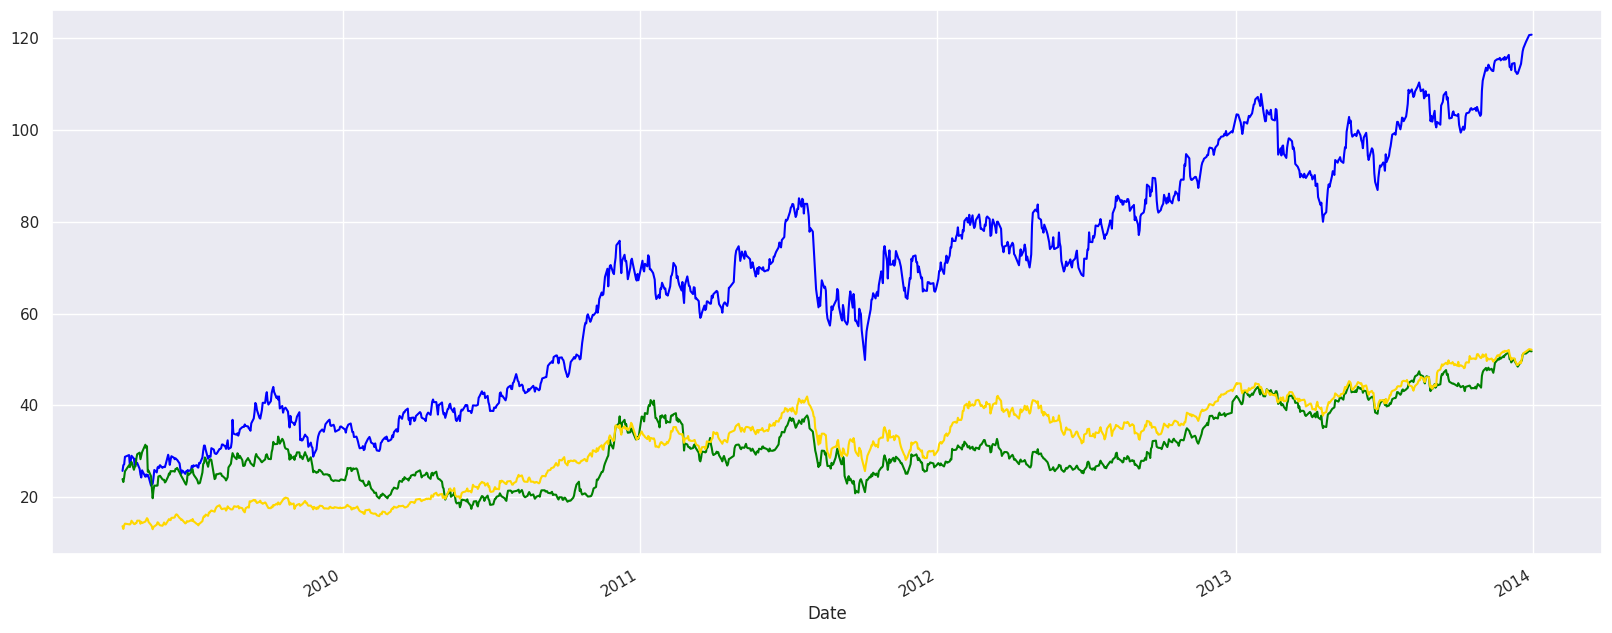

In [ ]:
#Trazamos los precios
#Este código se utiliza para visualizar gráficamente los precios de cierre ajustados de tres acciones (Volkswagen, Porsche y BMW)
#en diferentes períodos de tiempo.
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

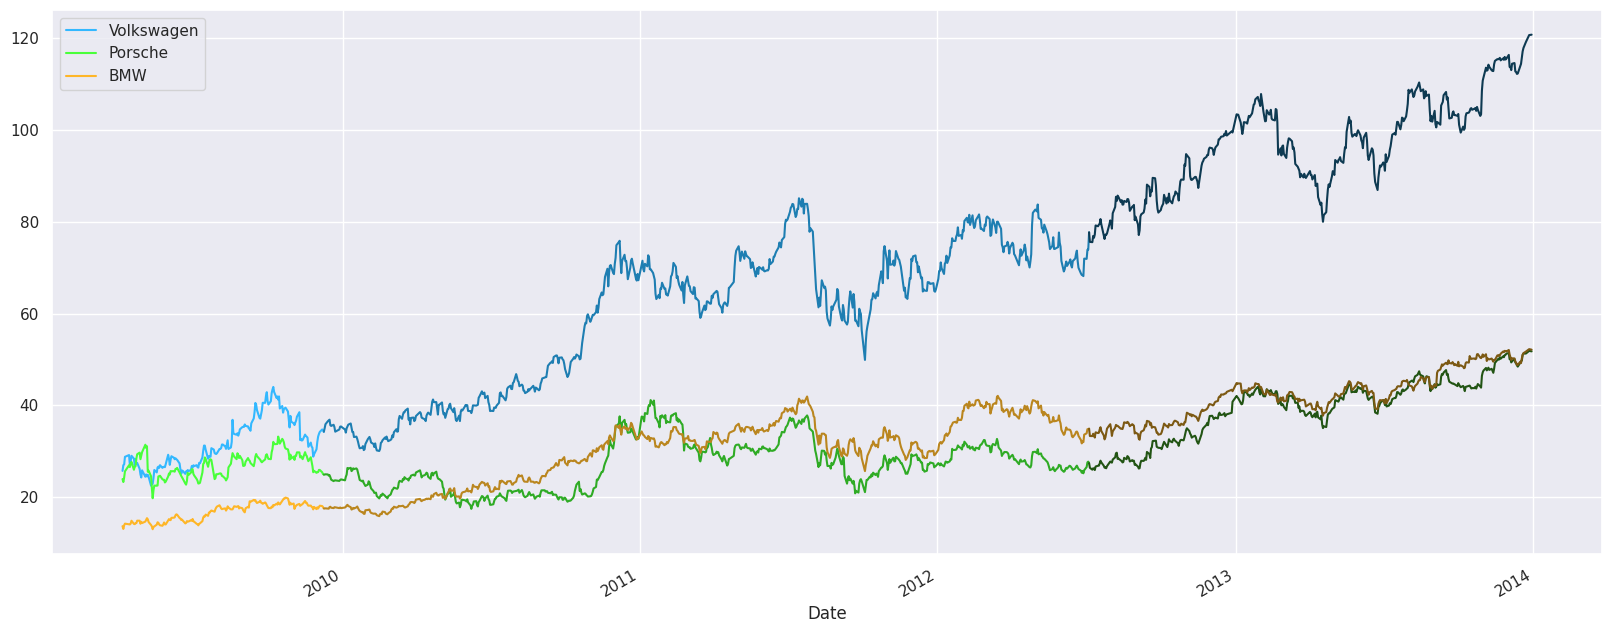

In [ ]:
# Grafica el rendimiento de tres empresas automotrices a lo largo del tiempo en diferentes rangos
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

# Continúa graficando el rendimiento de las empresas en el segundo rango de fechas
df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

# Finaliza graficando el rendimiento de las empresas en el tercer rango de fechas
df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

# Agrega una leyenda para identificar cada empresa
plt.legend(['Volkswagen','Porsche','BMW'])

# Muestra la gráfica
plt.show()

## Correlation

In [ ]:
# Imprime el título indicando que se mostrará la correlación entre fabricantes en un rango de fechas específico
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
# Calcula y muestra la correlación entre Volkswagen y Porsche en el rango de fechas
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
# Calcula y muestra la correlación entre Volkswagen y BMW en el rango de fechas
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
# Calcula y muestra la correlación entre Porsche y BMW en el rango de fechas
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8332186009493299
Volkswagen and BMW correlation: 	0.9795632573209117
Porsche and BMW correlation: 		0.8025667781658391


In [ ]:
# Imprime el título indicando que se mostrará la correlación entre fabricantes desde el inicio hasta ann_1
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
# Calcula y muestra la correlación entre Volkswagen y Porsche desde el inicio hasta ann_1
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
# Calcula y muestra la correlación entre Volkswagen y BMW desde el inicio hasta ann_1
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
# Calcula y muestra la correlación entre Porsche y BMW desde el inicio hasta ann_1
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6868922757650217
Volkswagen and BMW correlation: 	0.8444392798118465
Porsche and BMW correlation: 		0.6336651481123604


In [ ]:
# Imprime el título indicando que se mostrará la correlación entre fabricantes desde ann_1 hasta ann_2
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
# Calcula y muestra la correlación entre Volkswagen y Porsche desde ann_1 hasta ann_2
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
# Calcula y muestra la correlación entre Volkswagen y BMW desde ann_1 hasta ann_2
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
# Calcula y muestra la correlación entre Porsche y BMW desde ann_1 hasta ann_2
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7453551549363678
Volkswagen and BMW correlation: 	0.9793497251407051
Porsche and BMW correlation: 		0.7073063835099138


In [ ]:
# Imprime el título del análisis de correlación para el intervalo de tiempo desde 'ann_2' hasta 'end_date'.
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
# Calcula y muestra la correlación entre las acciones de Volkswagen y Porsche en el intervalo de tiempo.
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
# Calcula y muestra la correlación entre las acciones de Volkswagen y BMW en el intervalo de tiempo.
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
# Calcula y muestra la correlación entre las acciones de Porsche y BMW en el intervalo de tiempo.
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.9402184176022661
Volkswagen and BMW correlation: 	0.926613179048777
Porsche and BMW correlation: 		0.948083908901291


In [ ]:
# Imprime el título del análisis de correlación para el intervalo de tiempo desde 'end_date' hasta el último día del DataFrame.
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
# Calcula y muestra la correlación entre las acciones de Volkswagen y Porsche en el intervalo de tiempo.
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
# Calcula y muestra la correlación entre las acciones de Volkswagen y BMW en el intervalo de tiempo.
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
# Calcula y muestra la correlación entre las acciones de Porsche y BMW en el intervalo de tiempo.
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2014-01-01 to 2023-10-13 00:00:00

Volkswagen and Porsche correlation: 	0.8751435639313201
Volkswagen and BMW correlation: 	0.5285403701398341
Porsche and BMW correlation: 		0.5009781124982355


## Best Fitting Models

### For Volkswagen

In [ ]:
# Auto ARIMA model para las acciones de Volkswagen desde 'start_date' hasta 'ann_1', con Porsche y BMW como variables exógenas.

mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
# Auto ARIMA model para las acciones de Volkswagen desde 'ann_1' hasta 'ann_2', con Porsche y BMW como variables exógenas.

mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
# Auto ARIMA model para las acciones de Volkswagen desde 'ann_2' hasta 'end_date', con Porsche y BMW como variables exógenas.

mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)

In [ ]:
# Muestra el resumen del modelo ARIMA ajustado a las acciones de Volkswagen antes de 'ann_1'.
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  175
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -269.330
Date:                Fri, 13 Oct 2023   AIC                            540.659
Time:                        22:39:35   BIC                            543.818
Sample:                             0   HQIC                           541.941
                                - 175                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2942      0.073     17.657      0.000       1.151       1.438
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               217.48
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                            -0.68
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Muestra el resumen del modelo ARIMA ajustado a las acciones de Volkswagen entre 'ann_1' y 'ann_2'.
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  657
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1198.938
Date:                Fri, 13 Oct 2023   AIC                           2401.875
Time:                        22:39:38   BIC                           2410.847
Sample:                             0   HQIC                          2405.354
                                - 657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0768      0.032      2.395      0.017       0.014       0.140
sigma2         2.2646      0.092     24.522      0.000       2.084       2.446
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                76.10
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.57   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Muestra el resumen del modelo ARIMA ajustado a las acciones de Volkswagen después de la fecha 'ann_2'.
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  375
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -670.315
Date:                Fri, 13 Oct 2023   AIC                           1344.630
Time:                        22:39:41   BIC                           1352.479
Sample:                             0   HQIC                          1347.746
                                - 375                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0822      0.049      1.689      0.091      -0.013       0.178
sigma2         2.1100      0.114     18.454      0.000       1.886       2.334
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                51.80
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.16
Prob(H) (two-sided):                  0.53   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [ ]:
# Ajusta modelos ARIMA a las acciones de Porsche con exógenas (acciones de Volkswagen y BMW)
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)

In [ ]:
# Muestra un resumen de los resultados del modelo ARIMA ajustado a las acciones de Porsche desde start_date hasta ann_1, incluyendo las variables exógenas (acciones de Volkswagen y BMW).
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  175
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -236.630
Date:                             Fri, 13 Oct 2023   AIC                            479.261
Time:                                     22:41:02   BIC                            488.738
Sample:                                          0   HQIC                           483.105
                                             - 175                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1251      0.075      1.663      0.096      -0.022       0.272
ma.S.L5       -0.1513      0.072     -2.108      0.035      -0.292      -0.011
sigma2         0.8880      0.048     18.419      0.000       0.794       0.983
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               323.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Se usa para generar un resumen de un modelo estadistico, en este caso **mod_pr_btn_por.summary()**

In [ ]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  657
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -765.543
Date:                Fri, 13 Oct 2023   AIC                           1535.085
Time:                        22:41:08   BIC                           1544.058
Sample:                             0   HQIC                          1538.564
                                - 657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1003      0.032      3.158      0.002       0.038       0.163
sigma2         0.6041      0.019     31.240      0.000       0.566       0.642
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               433.76
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  375
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -380.747
Date:                Fri, 13 Oct 2023   AIC                            765.494
Time:                        22:41:16   BIC                            773.342
Sample:                             0   HQIC                           768.610
                                - 375                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0651      0.035      1.876      0.061      -0.003       0.133
sigma2         0.4485      0.026     16.937      0.000       0.397       0.500
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                19.11
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.12
Prob(H) (two-sided):                  0.92   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

**model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct"):**

* Aquí se utiliza auto_arima para ajustar automáticamente un modelo SARIMA a la serie de volatilidad "vol" en un rango de fechas específico, desde start_date hasta ann_1.
* Se especifican los máximos órdenes autoregresivos (p), de media móvil (q), estacionales (P, Q), y el parámetro trend que incluye una tendencia constante (c) y una tendencia lineal (t) en el modelo.

**df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), index=df[ann_1:ann_2].index):**

Se utiliza el modelo SARIMA ajustado (model_auto_pred_pr) para hacer predicciones en el rango de fechas desde ann_1 hasta ann_2. Las predicciones se almacenan en un DataFrame llamado df_auto_pred_pr.

**df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20, 5), color="red"):**

Aquí se realiza una gráfica de las predicciones del modelo SARIMA (df_auto_pred_pr) en color rojo en el rango de fechas desde ann_1 hasta ann_2.

**df.vol[ann_1:ann_2].plot(color="blue"):**

Se traza la serie real de volatilidad (columna "vol") en el mismo rango de fechas desde ann_1 hasta ann_2 en color azul.

**plt.title("VW Predictions (no Exog) vs Real Data", size=24):**

Se agrega un título al gráfico.

**plt.show():**

Finalmente, se muestra el gráfico que compara las predicciones del modelo SARIMA con los datos reales de volatilidad.



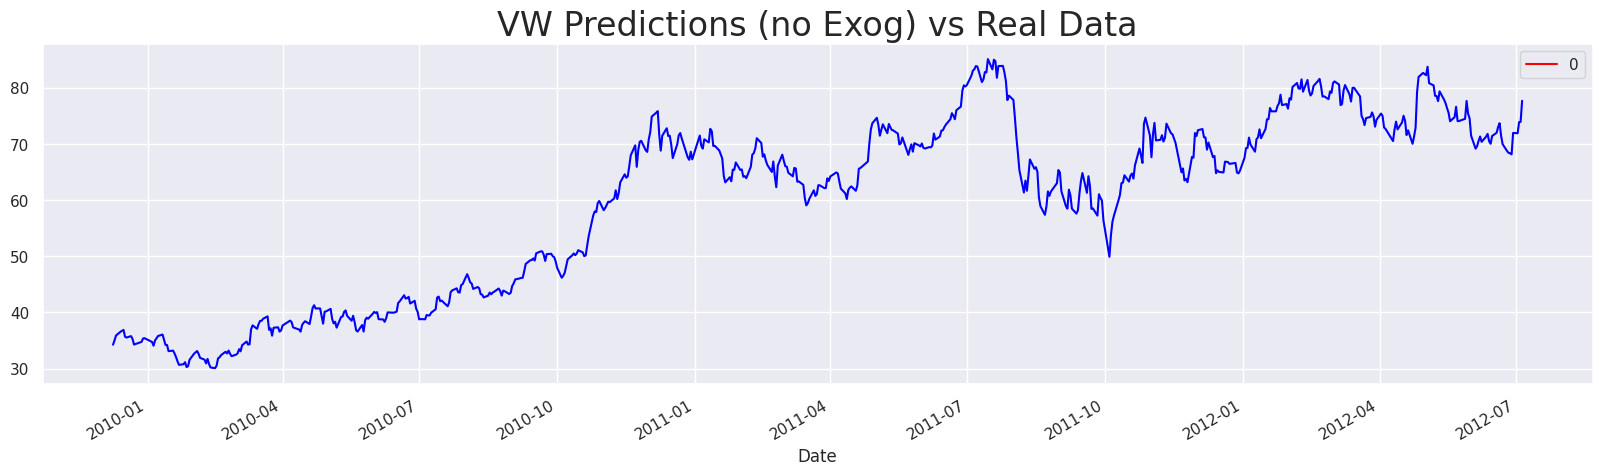

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

**df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize=(20, 5), color="red"):**

Se traza un gráfico de las predicciones del modelo SARIMA (almacenadas en df_auto_pred_pr) en el rango de fechas desde ann_1 hasta '2010-03-01' en color rojo.

**df.vol[ann_1:'2010-03-01'].plot(color="blue"):**

Se traza la serie real de volatilidad (columna "vol") en el mismo rango de fechas desde ann_1 hasta '2010-03-01' en color azul.

**plt.title("VW Predictions (no Exog) vs Real Data (short term)", size=24):**

Se agrega un título al gráfico para indicar que se están comparando las predicciones con los datos reales a corto plazo.

**plt.show():**

Finalmente, se muestra el gráfico que compara las predicciones del modelo SARIMA con los datos reales de volatilidad en el período especificado.

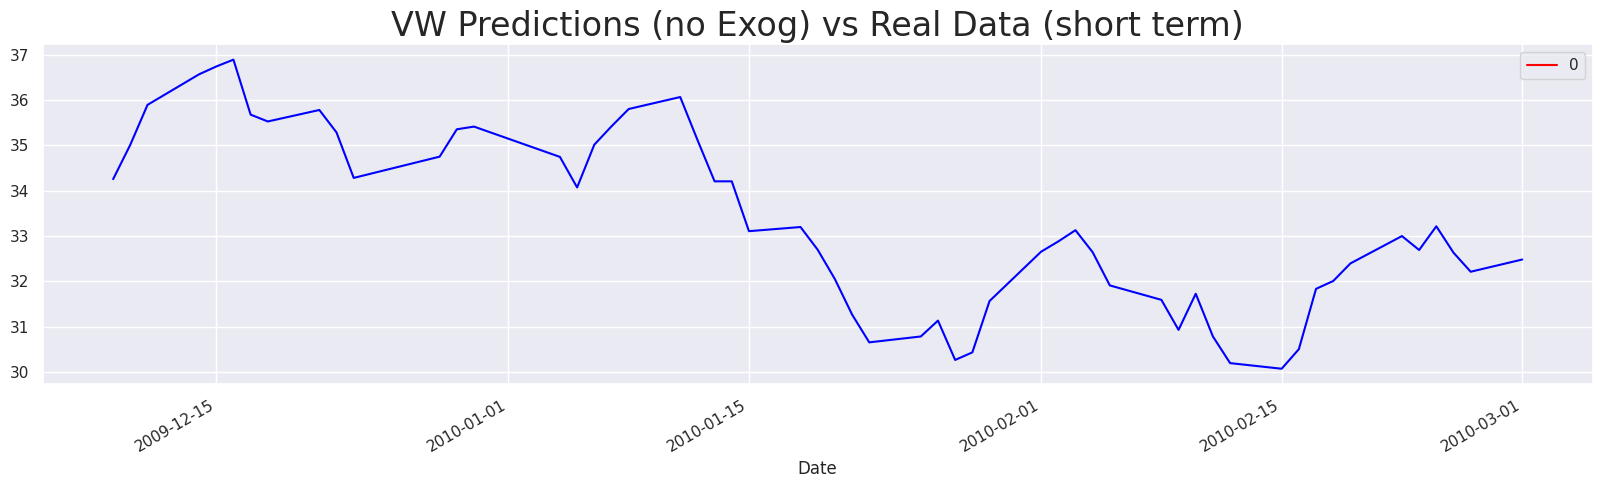

In [ ]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### For Volkswagen

**model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct"):**

Aquí se utiliza auto_arima para ajustar automáticamente un modelo SARIMA a la serie de volatilidad "vol" en un rango de fechas específico (desde start_date hasta ann_1).
Se incluye la variable exógena "por" mediante el argumento exogenous. Esto significa que el modelo tendrá en cuenta esta variable en las predicciones de volatilidad.
Se especifican los máximos órdenes autoregresivos (p), de media móvil (q), estacionales (P, Q), y el parámetro trend que incluye una tendencia constante (c) y una tendencia lineal (t) en el modelo.

**df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous = df[['por']][ann_1:ann_2]), index=df[ann_1:ann_2].index):**

Se utiliza el modelo SARIMA ajustado (model_auto_pred_pr) para hacer predicciones de volatilidad en el rango de fechas desde ann_1 hasta ann_2, tomando en cuenta la variable exógena "por". Las predicciones se almacenan en un DataFrame llamado df_auto_pred_pr.

**df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20, 5), color="red"):**

Se traza un gráfico de las predicciones del modelo SARIMA (almacenadas en df_auto_pred_pr) en color rojo en el rango de fechas desde ann_1 hasta ann_2.

**df.vol[ann_1:ann_2].plot(color="blue"):**

Se traza la serie real de volatilidad (columna "vol") en el mismo rango de fechas desde ann_1 hasta ann_2 en color azul.

**plt.title("VW Predictions (Porsche as Exog) vs Real Data", size=24):**

Se agrega un título al gráfico para indicar que se están comparando las predicciones del modelo SARIMA con los datos reales de volatilidad tomando en cuenta la variable exógena "Porsche".

**plt.show():**

Finalmente, se muestra el gráfico que compara las predicciones del modelo SARIMA con los datos reales de volatilidad, teniendo en cuenta la variable exógena "Porsche".

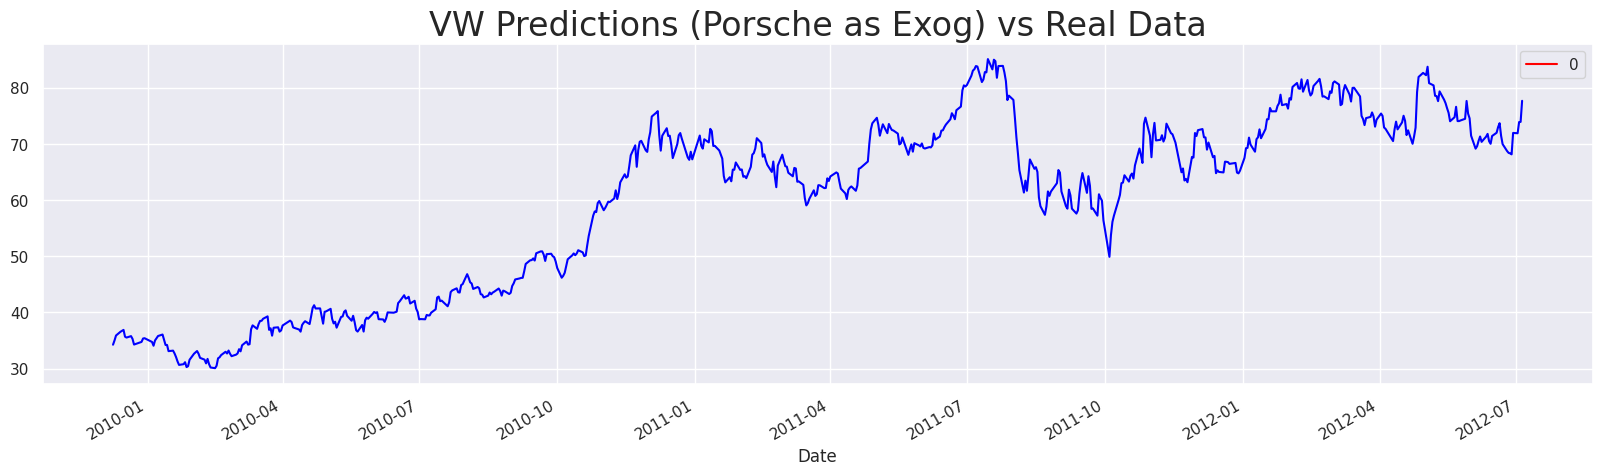

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

**model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct"):**

Aquí se utiliza auto_arima para ajustar automáticamente un modelo SARIMA a la serie de volatilidad "vol" en un rango de fechas específico (desde start_date hasta ann_1).
Se incluye la variable exógena "bmw" mediante el argumento exogenous. Esto significa que el modelo tendrá en cuenta esta variable en las predicciones de volatilidad.
Se especifican los máximos órdenes autoregresivos (p), de media móvil (q), estacionales (P, Q), y el parámetro trend que incluye una tendencia constante (c) y una tendencia lineal (t) en el modelo.

**df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index):**

Se utiliza el modelo SARIMA ajustado (model_auto_pred_pr) para hacer predicciones de volatilidad en el rango de fechas desde ann_1 hasta ann_2, tomando en cuenta la variable exógena "bmw". Las predicciones se almacenan en un DataFrame llamado df_auto_pred_pr.

**df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20, 5), color="red"):**

Se traza un gráfico de las predicciones del modelo SARIMA (almacenadas en df_auto_pred_pr) en color rojo en el rango de fechas desde ann_1 hasta ann_2.

**df.vol[ann_1:ann_2].plot(color="blue"):**

Se traza la serie real de volatilidad (columna "vol") en el mismo rango de fechas desde ann_1 hasta ann_2 en color azul.

**plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size=24):**

Se agrega un título al gráfico para indicar que se están comparando las predicciones del modelo SARIMA con los datos reales de volatilidad tomando en cuenta la variable exógena "BMW".

**plt.show():**

Finalmente, se muestra el gráfico que compara las predicciones del modelo SARIMA con los datos reales de volatilidad, teniendo en cuenta la variable exógena "BMW".

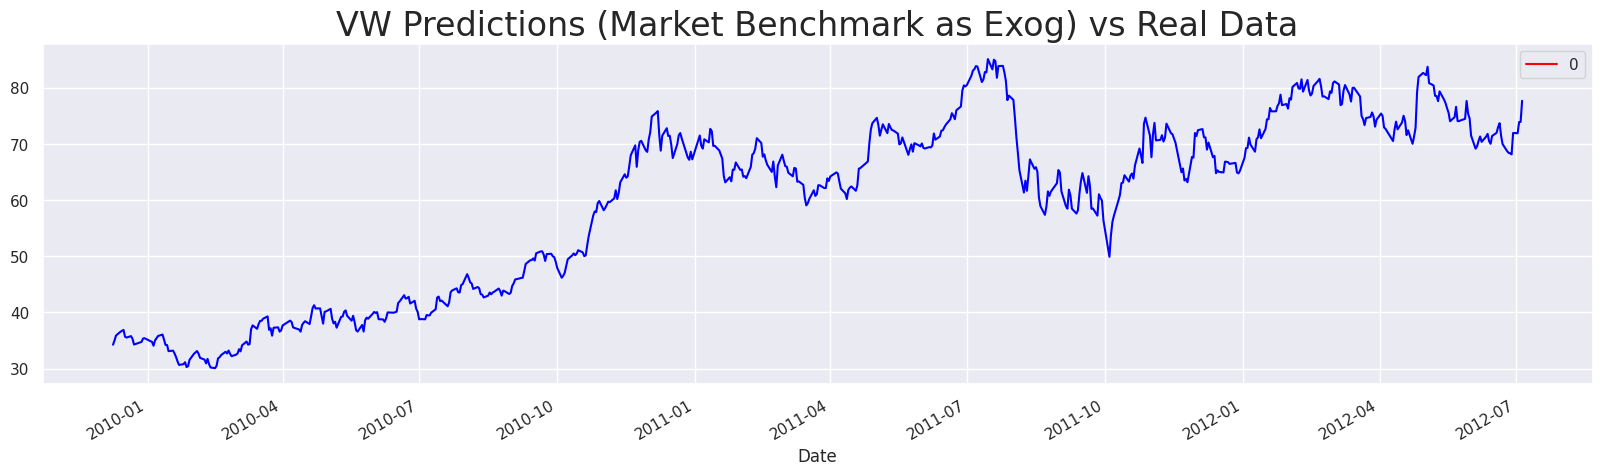

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

**model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct"):**

Aquí se utiliza auto_arima para ajustar automáticamente un modelo SARIMA a la serie de volatilidad "vol" en un rango de fechas específico (desde start_date hasta ann_1).
Se incluyen las variables exógenas "por" y "bmw" mediante el argumento exogenous. Esto significa que el modelo tendrá en cuenta ambas variables en las predicciones de volatilidad.
Se especifican los máximos órdenes autoregresivos (p), de media móvil (q), estacionales (P, Q), y el parámetro trend que incluye una tendencia constante (c) y una tendencia lineal (t) en el modelo.

**df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index):**

Se utiliza el modelo SARIMA ajustado (model_auto_pred_pr) para hacer predicciones de volatilidad en el rango de fechas desde ann_1 hasta ann_2, tomando en cuenta las variables exógenas "por" y "bmw". Las predicciones se almacenan en un DataFrame llamado df_auto_pred_pr.

**df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20, 5), color="red"):**

Se traza un gráfico de las predicciones del modelo SARIMA (almacenadas en df_auto_pred_pr) en color rojo en el rango de fechas desde ann_1 hasta ann_2.

**df.vol[ann_1:ann_2].plot(color="blue"):**

Se traza la serie real de volatilidad (columna "vol") en el mismo rango de fechas desde ann_1 hasta ann_2 en color azul.

**plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size=24):**

Se agrega un título al gráfico para indicar que se están comparando las predicciones del modelo SARIMA con los datos reales de volatilidad tomando en cuenta las variables exógenas "Porsche" y "BMW".

**plt.show():**

Finalmente, se muestra el gráfico que compara las predicciones del modelo SARIMA con los datos reales de volatilidad, teniendo en cuenta ambas variables exógenas.

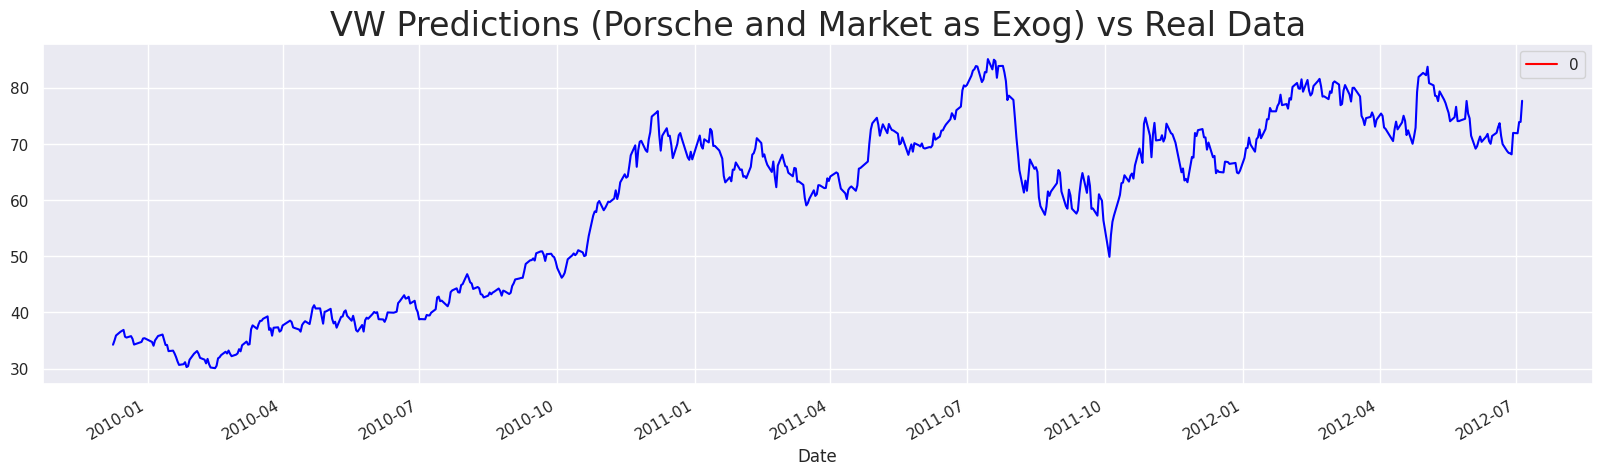

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

## Volatility

### Volatility of VW for Each Period

**df['sq_vol'][start_date:ann_1].plot(figsize=(20, 5), color="#33B8FF"):**

Se traza un gráfico de la serie temporal de la volatilidad al cuadrado en el primer intervalo de tiempo, que va desde start_date hasta ann_1.
El color del gráfico se establece en azul claro (código de color "#33B8FF").

**df['sq_vol'][ann_1:ann_2].plot(color="#1E7EB2"):**

Se traza un gráfico de la serie temporal de la volatilidad al cuadrado en el segundo intervalo de tiempo, que va desde ann_1 hasta ann_2.
El color del gráfico se establece en un tono más oscuro de azul (código de color "#1E7EB2").

**df['sq_vol'][ann_2:end_date].plot(color="#0E3A52"):**

Se traza un gráfico de la serie temporal de la volatilidad al cuadrado en el tercer intervalo de tiempo, que va desde ann_2 hasta end_date.
El color del gráfico se establece en un tono aún más oscuro de azul (código de color "#0E3A52").

**plt.show():**

Finalmente, se muestra el gráfico que compara la serie de volatilidad al cuadrado en los tres intervalos de tiempo diferentes.

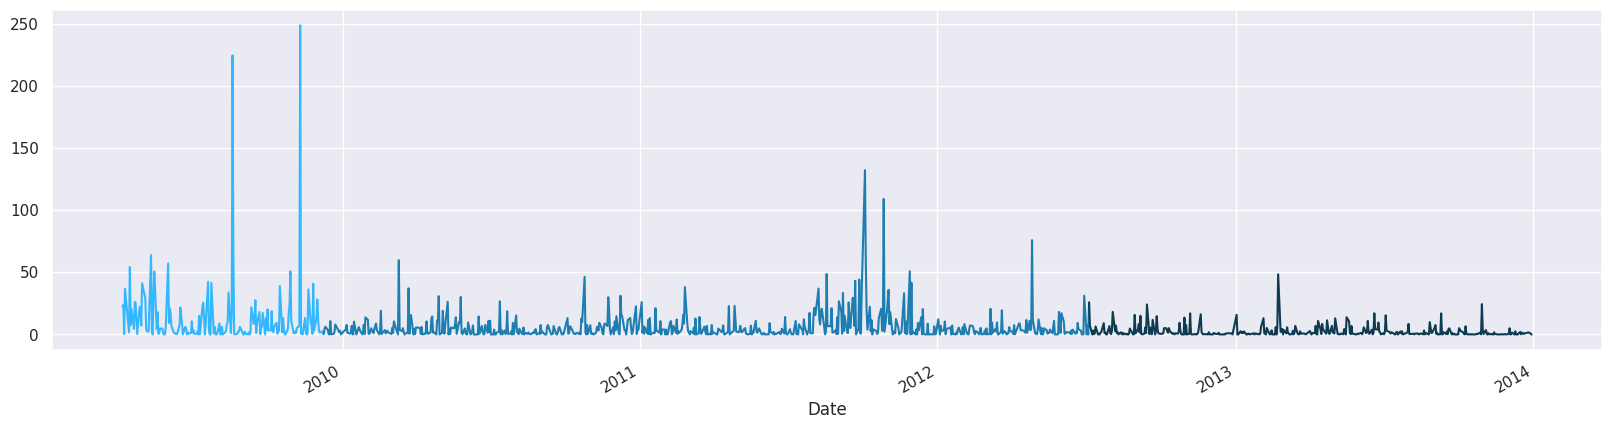

In [ ]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

### Volatility Trends for Each Period

**model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean="Constant", vol="GARCH", p=1, q=1):**

Se crea un modelo GARCH para el primer intervalo de tiempo, que va desde start_date hasta ann_1.
El modelo GARCH tiene una media constante ("Constant") y utiliza un proceso GARCH(1,1) para modelar la volatilidad condicional.
Los parámetros p y q se establecen en 1.

**results_garch_pre = model_garch_pre.fit(update_freq=5):**

Se ajusta el modelo GARCH para el primer intervalo de tiempo utilizando los datos de rendimientos de volatilidad en ese período.
Los resultados del ajuste se almacenan en la variable results_garch_pre.

**model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean="Constant", vol="GARCH", p=1, q=1):**

Se crea un modelo GARCH para el segundo intervalo de tiempo, que va desde ann_1 hasta ann_2.
Al igual que en el caso anterior, se utiliza un modelo GARCH con una media constante y un proceso GARCH(1,1) para modelar la volatilidad condicional.

**results_garch_btn = model_garch_btn.fit(update_freq=5):**

Se ajusta el modelo GARCH para el segundo intervalo de tiempo utilizando los datos de rendimientos de volatilidad en ese período.
Los resultados del ajuste se almacenan en la variable results_garch_btn.

**model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean="Constant", vol="GARCH", p=1, q=1):**

Se crea un modelo GARCH para el tercer intervalo de tiempo, que va desde ann_2 hasta end_date.
Nuevamente, se utiliza un modelo GARCH con una media constante y un proceso GARCH(1,1) para modelar la volatilidad condicional.

**results_garch_post = model_garch_post.fit(update_freq=5):**

Se ajusta el modelo GARCH para el tercer intervalo de tiempo utilizando los datos de rendimientos de volatilidad en ese período.
Los resultados del ajuste se almacenan en la variable results_garch_post.

In [ ]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 467.7575503907698
Iteration:     10,   Func. Count:     56,   Neg. LLF: 467.33014289622065
Iteration:     15,   Func. Count:     80,   Neg. LLF: 467.32992930460193
Optimization terminated successfully    (Exit mode 0)
            Current function value: 467.3299292759259
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1488.8764051902717
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1488.7049749439077
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     33,   Neg. LLF: 695.4334049275237
Iteration:     10,   Func. Count:     58,   Neg. LLF: 695.359209136436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 695.359209136181
            Iterations: 10
            Fun

El código results_garch_pre.summary() se utiliza para imprimir un resumen de los resultados del ajuste del modelo GARCH al primer intervalo de tiempo. **El resumen proporciona información sobre los parámetros estimados del modelo GARCH y diversas estadísticas asociadas.**

In [ ]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -467.330
Distribution:                  Normal   AIC:                           942.660
Method:            Maximum Likelihood   BIC:                           955.319
                                        No. Observations:                  175
Date:                Fri, Oct 13 2023   Df Residuals:                      174
Time:                        22:42:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1869      0.271      0.691      0.490 [ -0.344,  0.717]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         11.0393      7.222      1.529      0.126 [ -3.115, 25.194]
alpha[1]       0.1125      0.118      0.951      0.341 [ -0.119,  0.344]
beta[1]        0.0000      0.648      0.000      1.000 [ -1.270,  1.270]
========================================================================

Covariance estimator: robust
"""

In [ ]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1488.70
Distribution:                  Normal   AIC:                           2985.41
Method:            Maximum Likelihood   BIC:                           3003.36
                                        No. Observations:                  657
Date:                Fri, Oct 13 2023   Df Residuals:                      656
Time:                        22:42:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1931  8.697e-02      2.220  2.640e-02 [2.265e-02,  0.364]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1586  7.455e-02      2.128  3.335e-02   [1.252e-02,  0.305]
alpha[1]       0.0618  1.510e-02      4.092  4.275e-05 [3.219e-02,9.137e-02]
beta[1]        0.9120  1.838e-02     49.629      0.000     [  0.876,  0.948]
============================================================================

Covariance estimator: robust
"""

In [ ]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -695.359
Distribution:                  Normal   AIC:                           1398.72
Method:            Maximum Likelihood   BIC:                           1414.43
                                        No. Observations:                  375
Date:                Fri, Oct 13 2023   Df Residuals:                      374
Time:                        22:42:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1855  9.278e-02      2.000  4.552e-02 [3.699e-03,  0.367]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5054      0.506      0.999      0.318 [ -0.486,  1.497]
alpha[1]       0.1159      0.136      0.851      0.395 [ -0.151,  0.383]
beta[1]        0.6779      0.286      2.374  1.761e-02 [  0.118,  1.238]
========================================================================

Covariance estimator: robust
"""